In [1]:
### DATA SOURCE: https://www.kaggle.com/mirichoi0218/insurance/downloads/insurance.zip/1

In [2]:
%matplotlib inline

In [4]:
### LIBRARIES

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

In [5]:
### DEFAULT SEABORN STYLE SET FOR PLOTS

sns.set() 

In [11]:
### READING DATA AS DATA FRAME 

df = pd.read_csv('insurance.csv')

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# BASIC EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
### 1338 INSTANCES
### 7 ATTRIBUTES
### 2 INT
### 2 FLOAT
### 3 OBJECTS (STR)

In [12]:
### CHECK NULL VALUE

df.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


In [13]:
### NO NULL VALUES PRESENT IN THE DATA

In [14]:
### 5 POINT SUMMARY

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [15]:
### NOTHING OUT OF ORDINARY IN DATA
### 75% OF INDIVIDUALS HAVE 2 CHILDREN OR LESS
### AGE DISTRIBUTION SEEMS ACCURATELY REPRESENTATIVE
### SKEW CLAIM AMOUNT

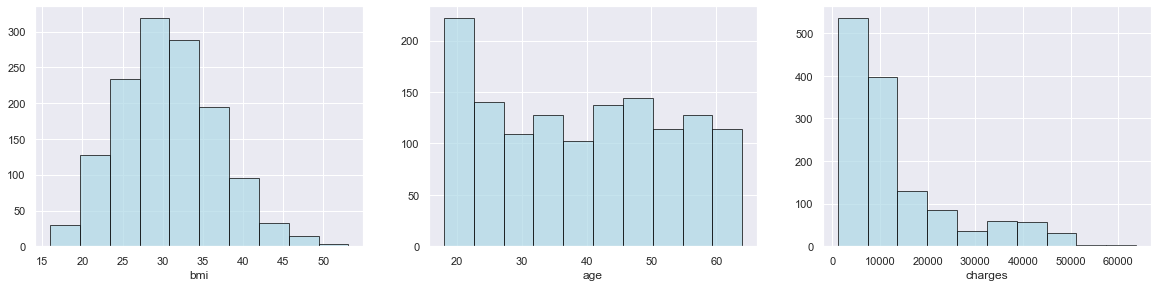

In [16]:
### DISTRIBUTION PLOTS OF CONTINOUES FEATURES

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()

In [17]:
### BMI: NORMAL DISTRIBUTION
### AGE: UNIFORM DISTRIBUTION
### CHARGES: HIGHLY SKEWED

In [18]:
### MEASUREMENT OF SKEWNESS

Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.bmi),stats.skew(df.age),stats.skew(df.charges)]},
                        index=['bmi','age','charges'])  
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


In [19]:
### BMI: LESS SKEWED
### AGE: STILL UNIFORM, BARELY ANY SKEW
### CHARGES: HIGHLY SKEWED

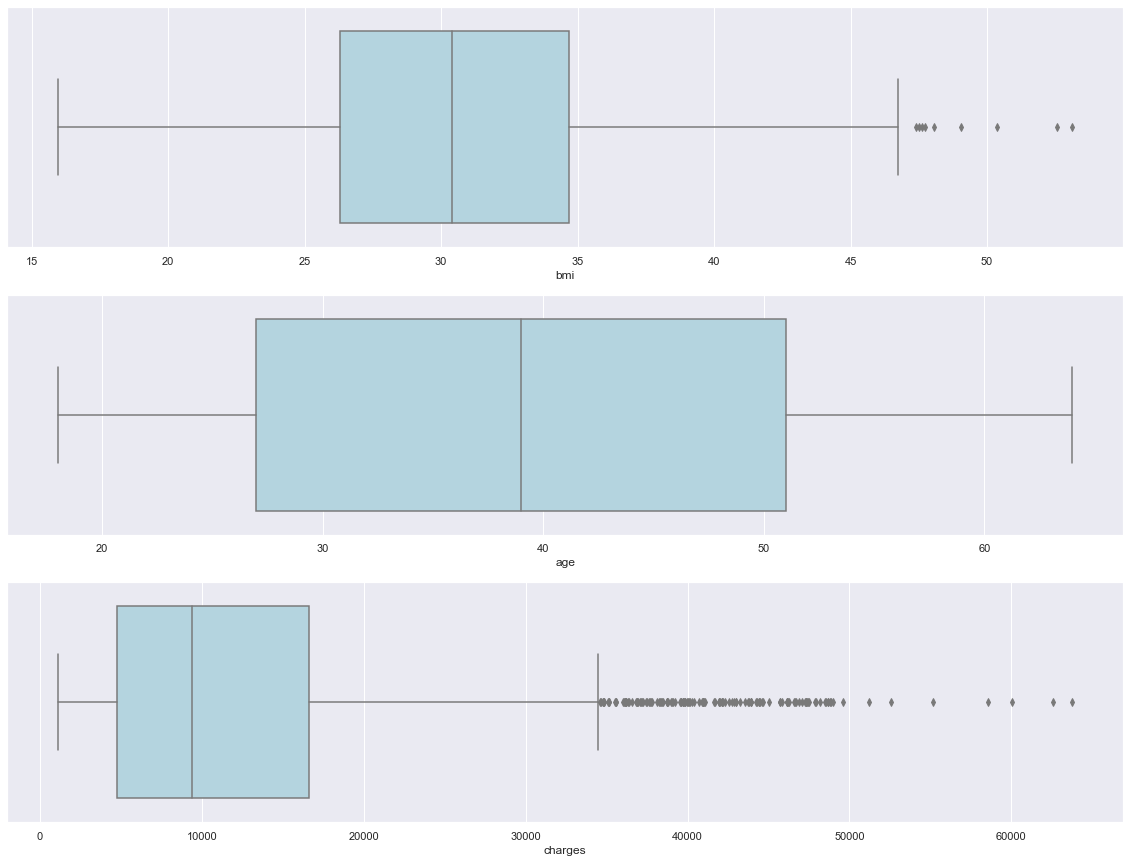

In [20]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df.bmi, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= df.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= df.charges, color='lightblue')

plt.show()

In [21]:
### BMI: FEW EXTREME VALUES
### CHARGES: A LOT OF EXTREME VALUES

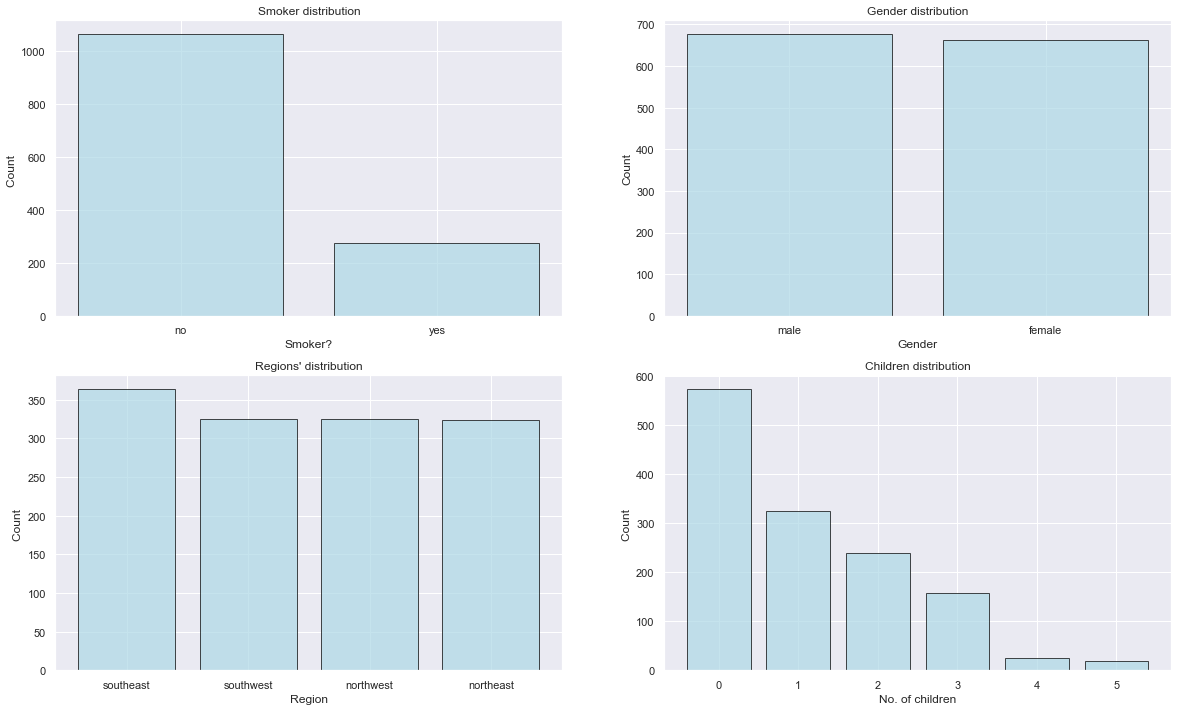

In [22]:
### BAR CHART PLOTS

plt.figure(figsize=(20,25))


x = df.smoker.value_counts().index   
y = [df['smoker'].value_counts()[i] for i in x]   

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1 = df.sex.value_counts().index    
y1 = [df['sex'].value_counts()[j] for j in x1]   

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = df.region.value_counts().index   
y2 = [df['region'].value_counts()[k] for k in x2]   

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")

x3 = df.children.value_counts().index    
y3 = [df['children'].value_counts()[l] for l in x3]   

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title("Children distribution")

plt.show()

In [23]:
### CONSIDERABLY MORE NON-SMOKERS COMPARED TO SMOKERS
### EVEN DISTRIBUTION OF INSTANCES ACROSS REGIONS
### GENDER IS EVENLY DISTRIBUTED
### MAJORITY OF INSTANCES HAVE 2 OR LESS CHILDREN. 

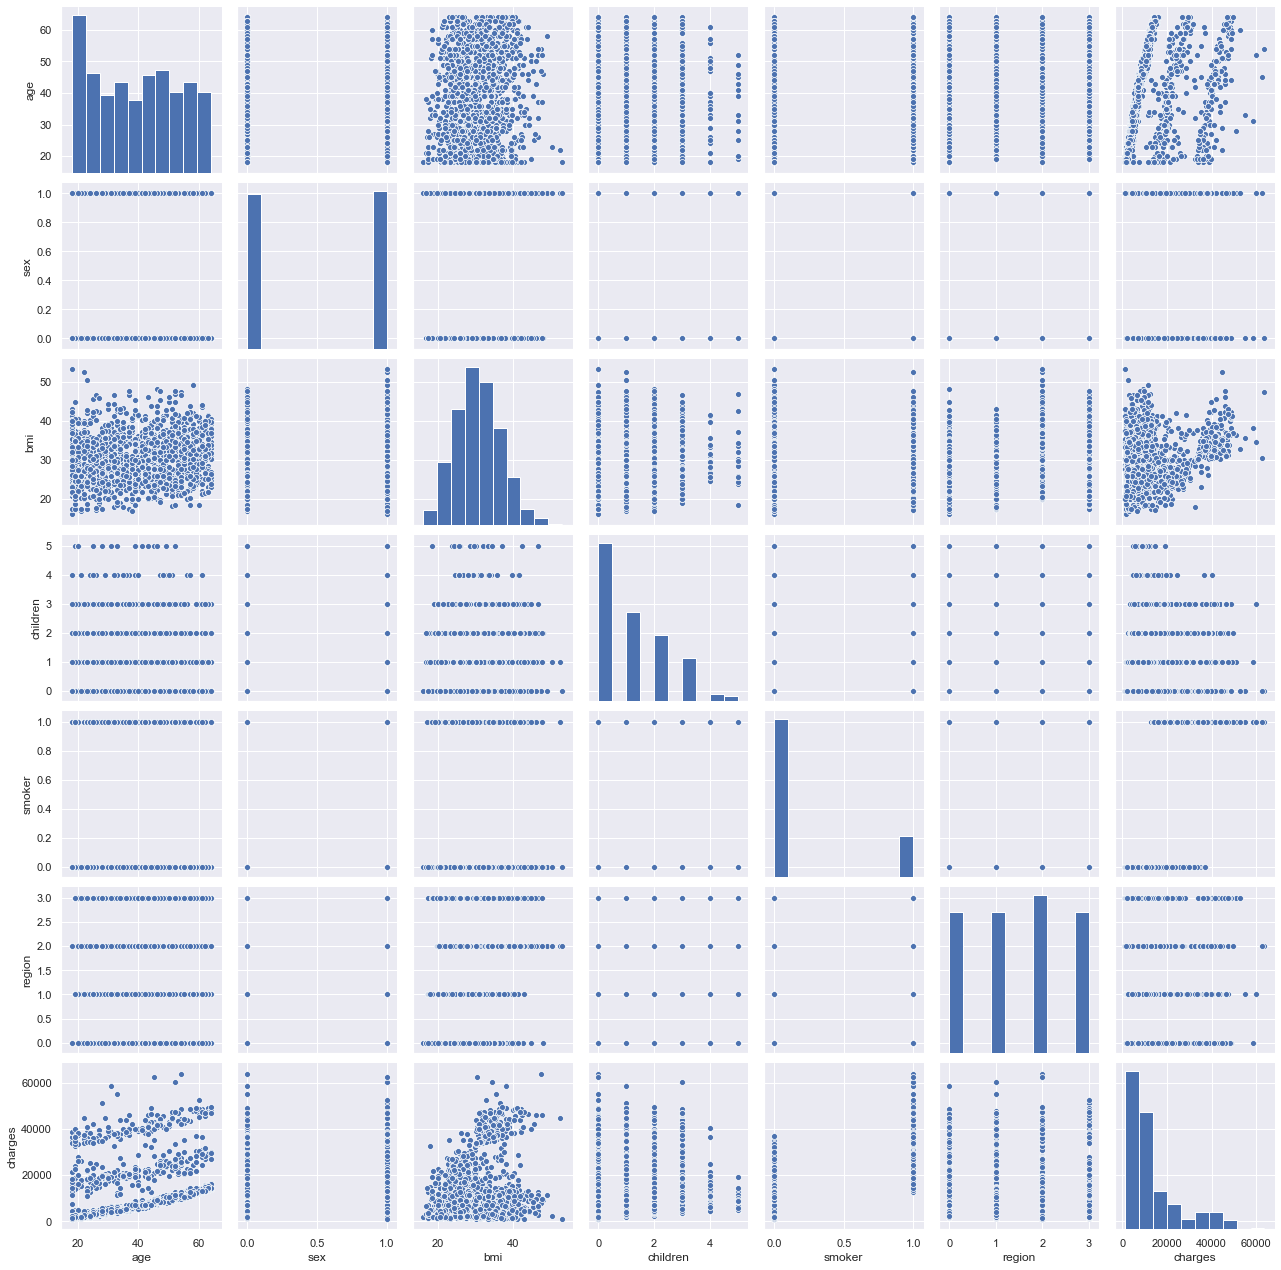

In [24]:
### BI-VARIATE DISTRIBUTION OF ALL ATTRIBUTE PAIRS

### LABEL ENCODING

df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex', 'smoker', 'region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(df_encoded)  
plt.show()

In [25]:
### OBVIOUS CORRELATION BETWEEN CHARGE VARIABLE AND SMOKER VARIABLE
### SMOKERS CLAIMED MORE MONEY THAN NON-SMOKERS
### A PATERN BETWEEN THE AGE AND CHARGES VARIABLE IS NOTICEABLE 

In [26]:
### DIFFERENCE OF CHARGES OF SMOKERS VS NON-SMOKERS

df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

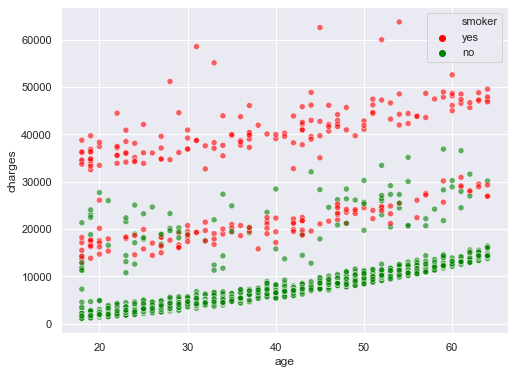

In [27]:
### SCATTER PLOT: VISUAL REPRESENTATION 
### VARIABLES: SMOKERS (YES/NO), CHARGES & AGE

plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

In [28]:
### OBVIOUS VISUAL DIFFERENCE BETWEEN CHARGES OF SMOKERS VS CHARGES OF NON-SMOKERS

In [29]:
### T-TEST

# NULL HYPOTHESIS
Ho = "Charges of smoker and non-smoker are same"   

# ALTERNATE HYPOTHESIS
Ha = "Charges of smoker and non-smoker are not the same"   

# CHARGES/SMOKERS ARRAY
x = np.array(df[df.smoker == 'yes'].charges)  

# CHARGES/NON-SMOKERS ARRAY
y = np.array(df[df.smoker == 'no'].charges) 

# INDEPENDENT T-TEST
t, p_value  = stats.ttest_ind(x,y, axis = 0)  

# 5% SIGNIFICANCE VALUE
if p_value < 0.05:  
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


In [30]:
### SMOKERS CLAIM SIGNIFICANTLY MORE MONEY THAN NON-SMOKERS

In [31]:
### BMI DIFFERENCES BETWEEN MALES & FEMALES

df.sex.value_counts() 

male      676
female    662
Name: sex, dtype: int64

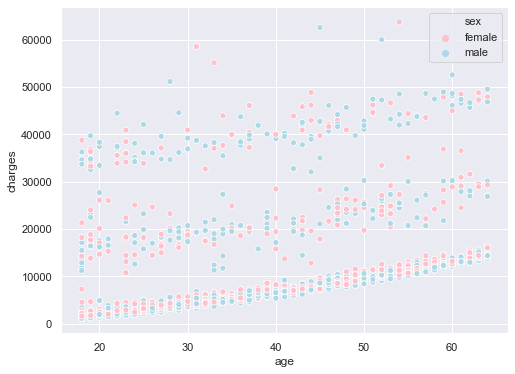

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.sex,palette= ['pink','lightblue'] )
plt.show()

In [33]:
### NO OBVIOUS RELATIONSHIP BETWEEN GENDER AND CHARGES

In [34]:
### T-TEST 

Ho = "Gender has no effect on bmi"  
Ha = "Gender has an effect on bmi"   

x = np.array(df[df.sex == 'male'].bmi)  
y = np.array(df[df.sex == 'female'].bmi) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  

if p_value < 0.05:  
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


In [35]:
### IDENTICAL BMI

In [36]:
### SMOKERS AND GENDER SIGNIFICANCE

# CHI SQUARE TEST: SMOKING HABITS AND GENDER

Ho = "Gender has no effect on smoking habits"   
Ha = "Gender has an effect on smoking habits"   

crosstab = pd.crosstab(df['sex'],df['smoker']) 

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


In [37]:
### SIGNIFICANT DIFFERENCES BETWEEN GENDERS

In [38]:
# CHI SQUARE TEST: SMOKING HABITS AND REGIONS

Ho = "Region has no effect on smoking habits"   
Ha = "Region has an effect on smoking habits"  

crosstab = pd.crosstab(df['smoker'], df['region'])  

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Region has no effect on smoking habits as the p_value (0.062) > 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [39]:
### SIMILAR SMOKING HABITS ACROSS REGIONS

In [41]:
### DISTRIBUTION: BMI VALUES, FEMALES AND NUMBER OF CHILDREN

Ho = "No. of children has no effect on bmi"   
Ha = "No. of children has an effect on bmi"   


female_df = copy.deepcopy(df[df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05


In [42]:
### NUMBER OF CHILDREN HAS NO EFFECT ON FEMALE BMI IN THIS DATA-SET